<a href="https://colab.research.google.com/github/ybrefodlavir/PCVK_Genap/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change brightness level of the image
Enter brightness value:50


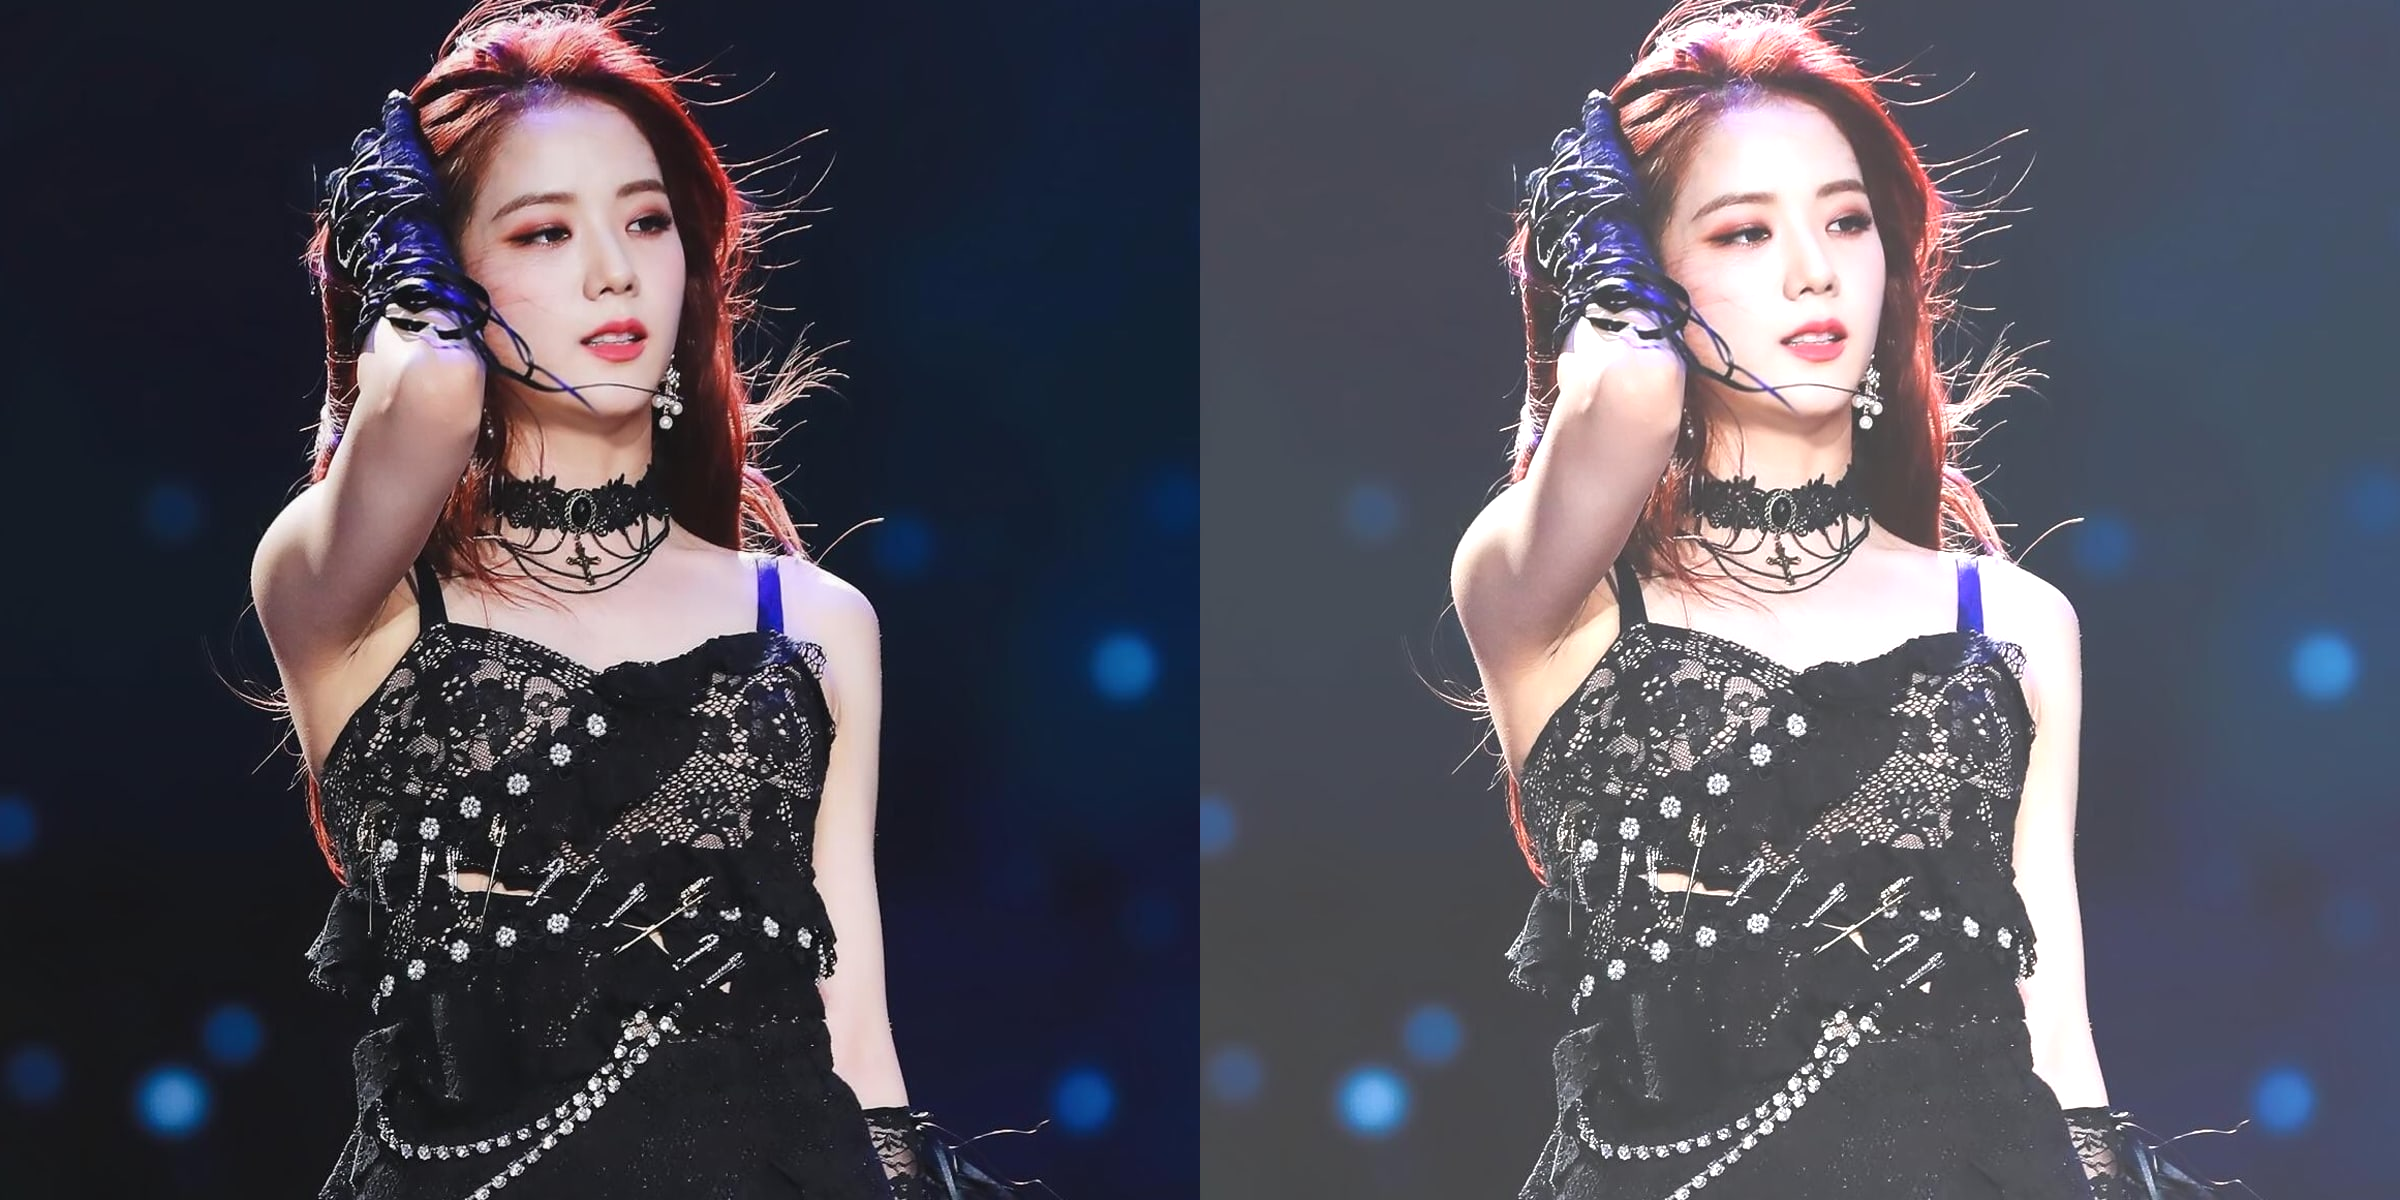

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io 
import matplotlib.pyplot as plt
import numpy as np

print('Change brightness level of the image')
try:
  brightness = int(input('Enter brightness value:'))
except ValueError:
  print('Error,not a number')

original = cv.imread('/content/drive/MyDrive/female.jpg')
brightness_image = np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness,0,255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Changing the contrast and brightness of the image
--------------------------------------------
Enter brightness value [-255 - 255]: 60
Enter contrast [1.0 - 3.0]: 1.5


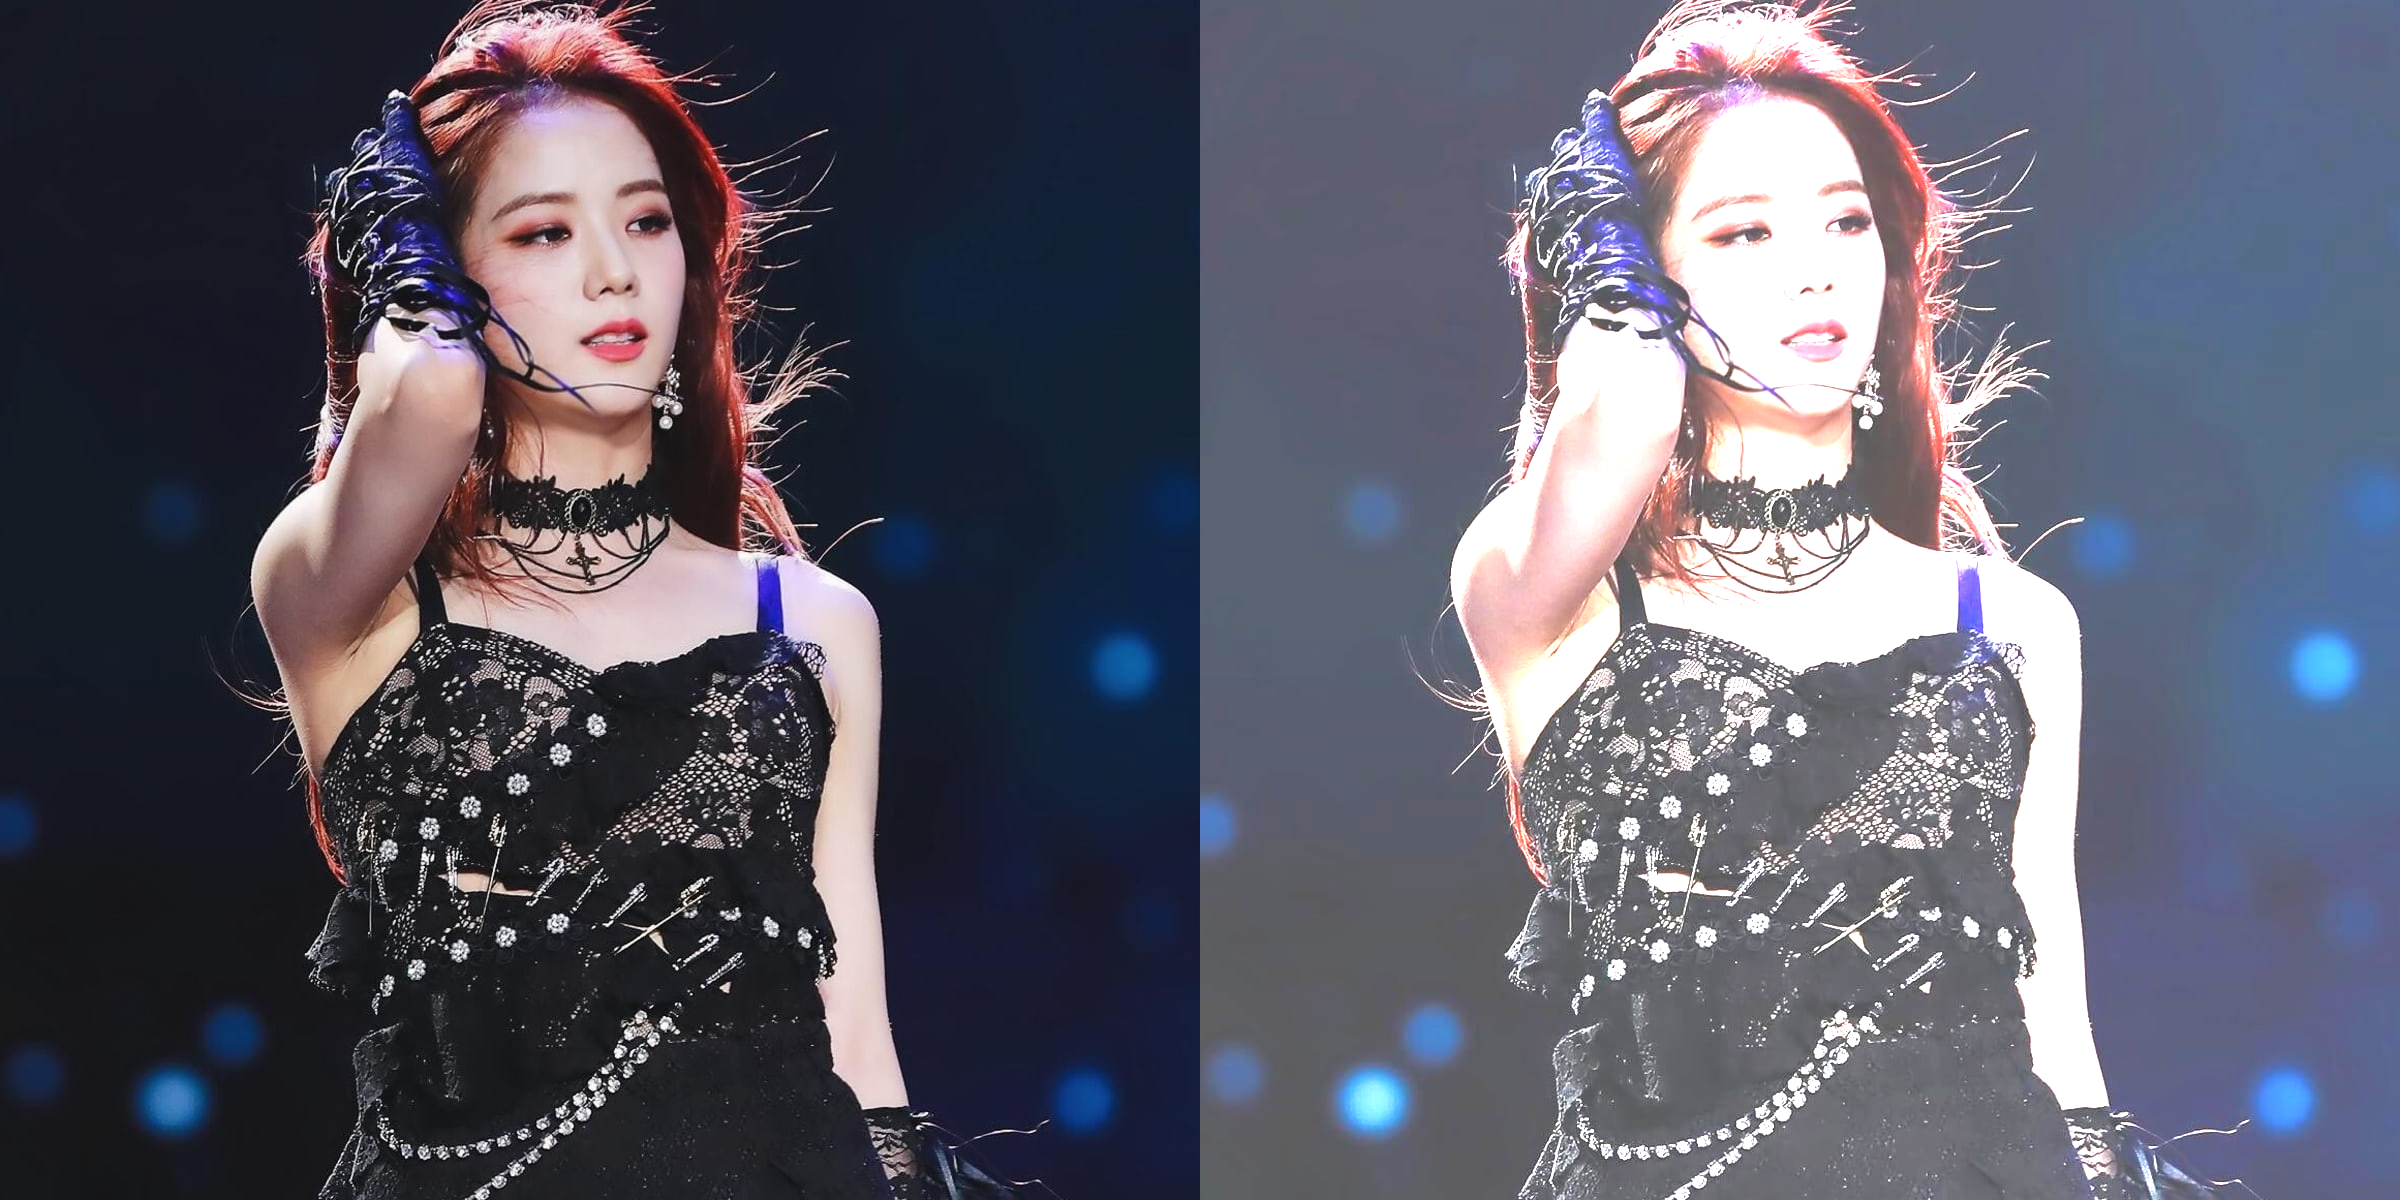

In [14]:
#Task 1
print('Changing the contrast and brightness of the image')
print('--------------------------------------------')
try :
  brightness = int(input('Enter brightness value [-255 - 255]: '))
  contrast = float(input('Enter contrast [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/female.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Changing the brightness level of an image with Log Transform
-------------------------------------------------------------
Enter brightness value : 40


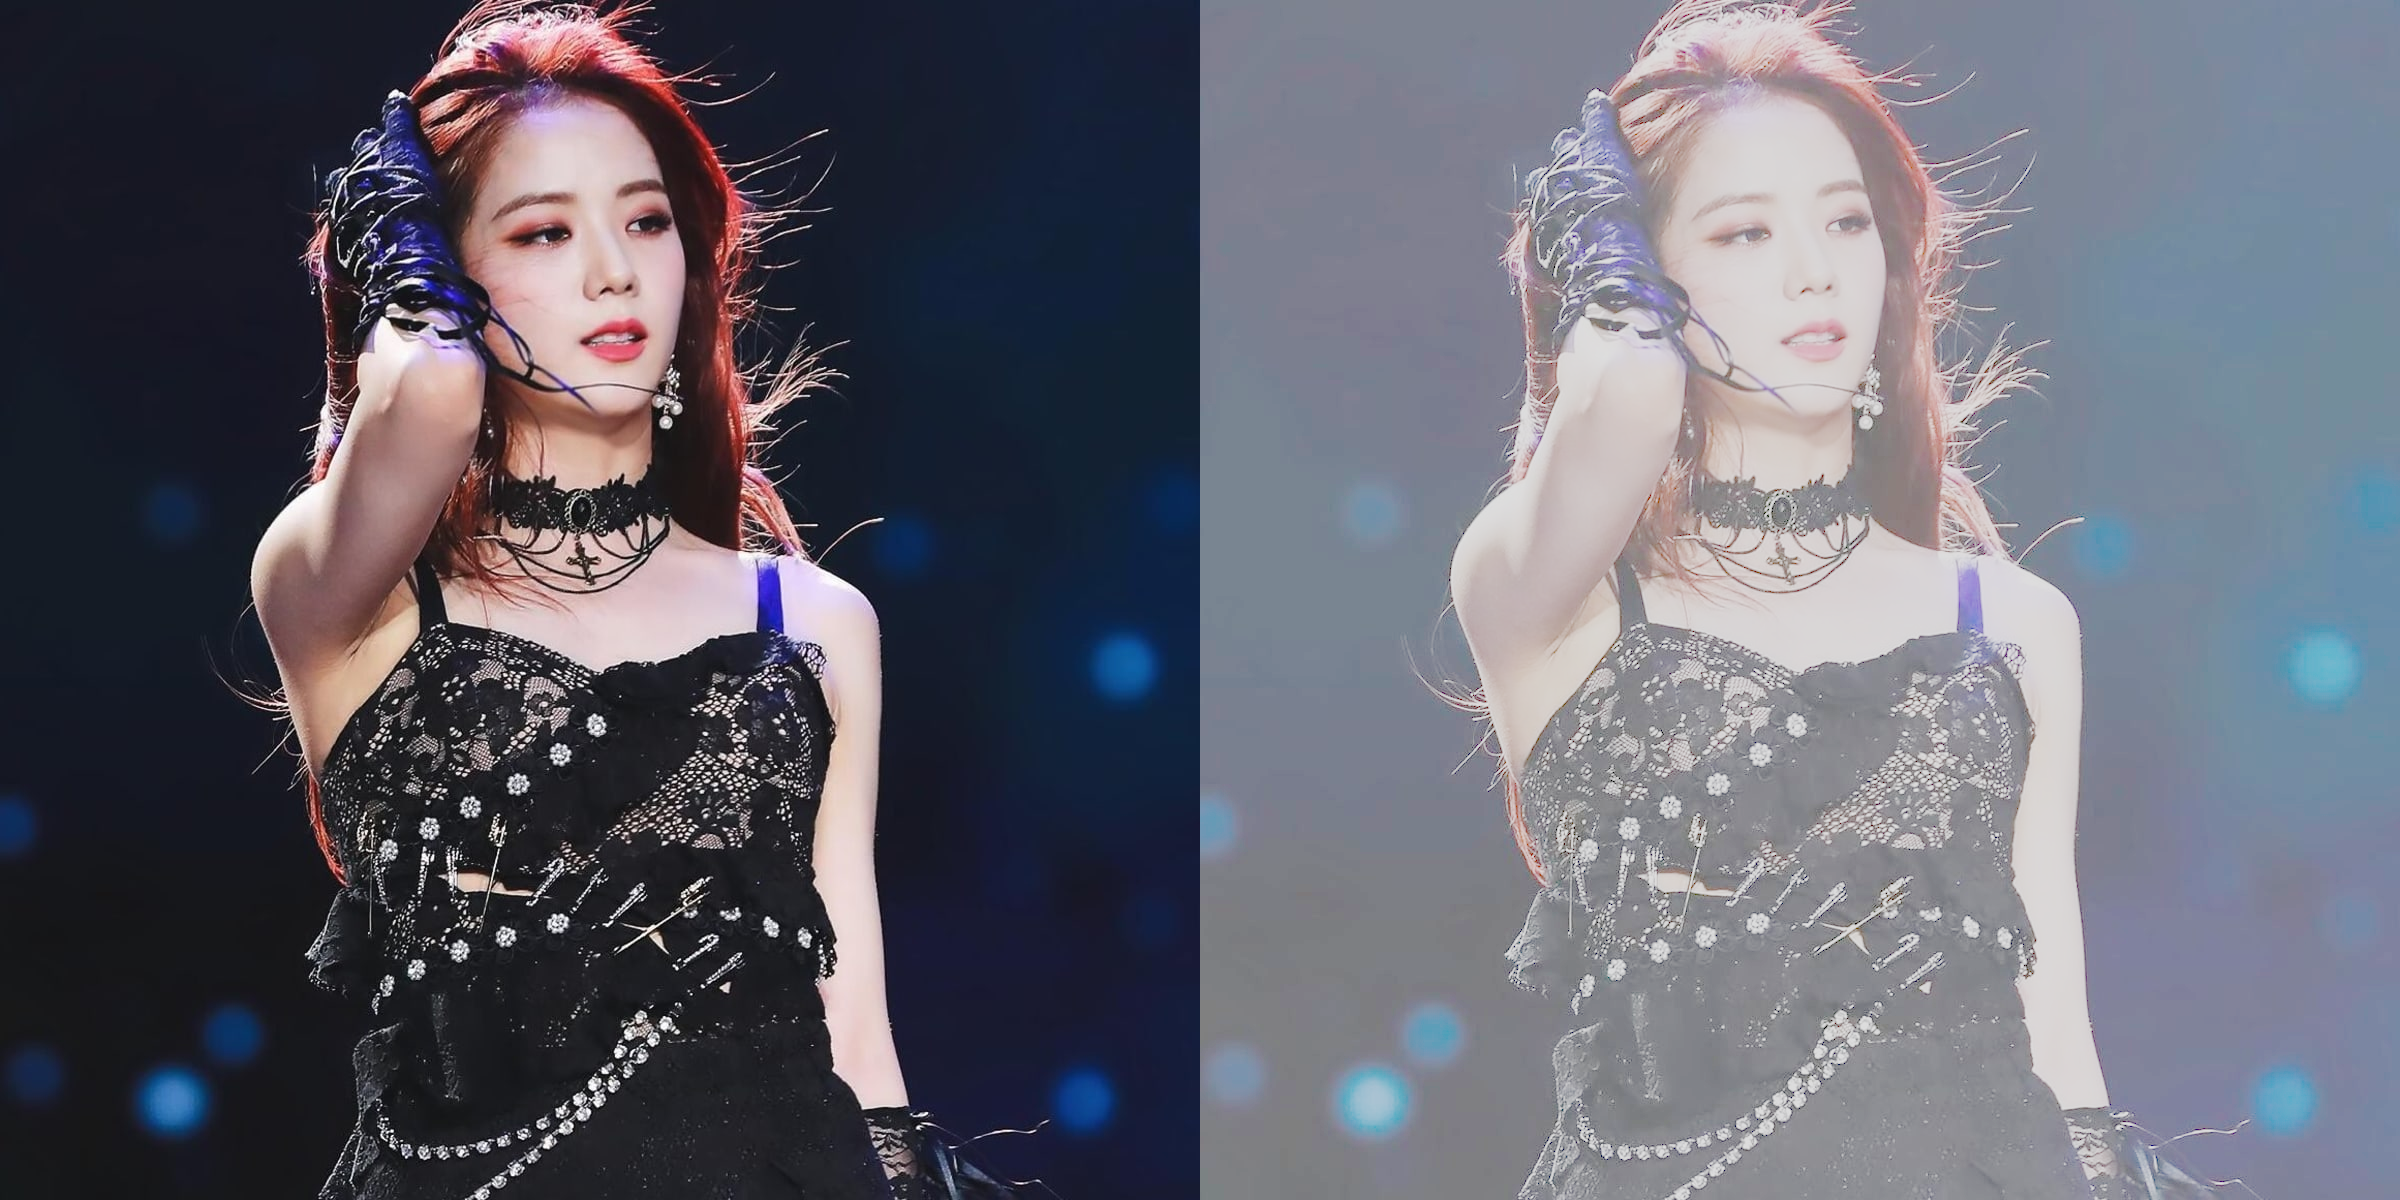

In [13]:
#Task 2
print('Changing the brightness level of an image with Log Transform')
print('-------------------------------------------------------------')
try:
  brightness = int(input('Enter brightness value : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])),0,255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

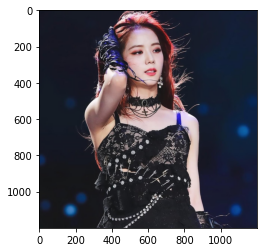

In [15]:
#Task 3
img1 = cv.imread('/content/drive/MyDrive/female.jpg')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
plt.imshow(img1)

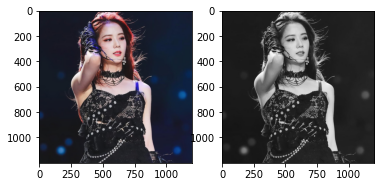

In [16]:
#3a.Averaging
imgAvg = cv.imread('/content/drive/MyDrive/female.jpg')
imgAvg[:] = imgAvg.mean(axis=-1, keepdims=1)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(imgAvg)

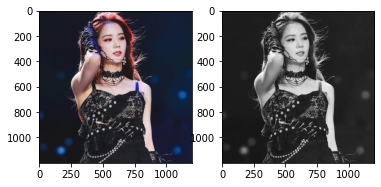

In [19]:
#3b. Lightness
imgLight = cv.imread('/content/drive/MyDrive/female.jpg')
imgLight[:] = np.max(imgLight,axis=-1,keepdims=10)/2+np.min(imgLight,axis=-1,keepdims=10)/2
fig,ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(imgLight)

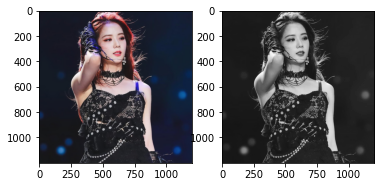

In [21]:
#3c. Luminance
imageLuminance = cv.imread('/content/drive/MyDrive/female.jpg')
R, G , B = imageLuminance[:,:,0], imageLuminance[:,:,1],imageLuminance[:,:,2]
imageGray = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(imageGray,cmap='gray')

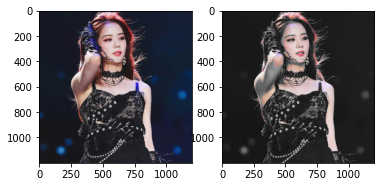

In [23]:
img2 = cv.imread('/content/drive/MyDrive/female.jpg')
ret, mask = cv.threshold(img2[:,:,2], 180, 255, cv.THRESH_BINARY)

mask2 = np.zeros_like(img2)
mask2[:,:,0] = mask
mask2[:,:,1] = mask
mask2[:,:,2] = mask

red = cv.bitwise_and(img1, mask2)

gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img2, 255 - mask2)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(out, cmap='gray')